# Построение графиков из файлика

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mpg = sns.load_dataset("mpg")

# Функция load_dataset() формирует набор данных и возвращает его в виде объекта pandas.DataFrame.
# В наборе mpg содержится информация о характеристиках ряда автомобилей. 

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


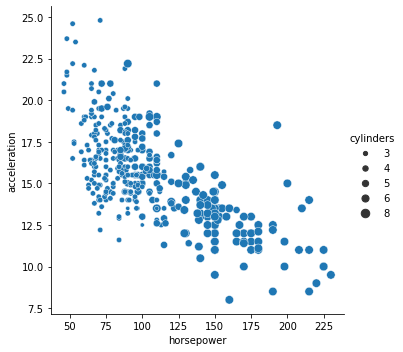

In [ ]:
# Построим зависимость ускорения (acceleration) от количества лошадиных сил (horsepower), 
# при этом размер точки будет определяться количеством цилиндров

sns.relplot(x="horsepower", y="acceleration", size="cylinders", data=mpg);
plt.show()

## Линейный график

In [ ]:
# Для демонстрации работы функции построения линейного графика загрузим набор данных flights, 
# содержащий информацию о количестве пассажиров, которые воспользовались авиатранспортом

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


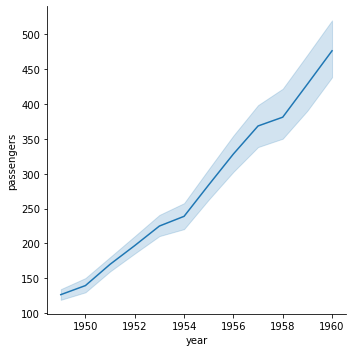

In [ ]:
# Построим зависимость количества перевезённых пассажиров (passengers) от года (year)

sns.relplot(x="year", y="passengers", kind="line", legend="full", data=flights);
plt.show()

## Работа с категориальными данными

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


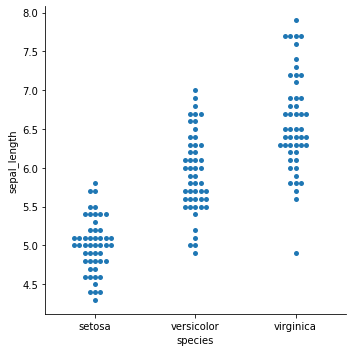

In [ ]:
# Загруженный набор данных является эталонным для изучения алгоритмов классификации, он представляет собой информацию о 150 
# экземплярах ириса по 50 на каждый отдельный вид: Ирис щетинистый (setosa), Ирис Виргинский (virginica) и 
# Ирис разноцветный (versicolor). Для каждого экземпляра определены следующие параметры:
# • Длина наружной доли околоцветника (sepal_length);
# • Ширина наружной доли околоцветника (sepal_width);
# • Длина внутренней доли околоцветника (petal_length);
# • Ширина внутренней доли околоцветника (petal_width).
# Для визуализации этого набора воспользуемся функцией catplot()

sns.catplot(x="species", y="sepal_length", kind="swarm", data=iris);
plt.show()

## Ящик с усами

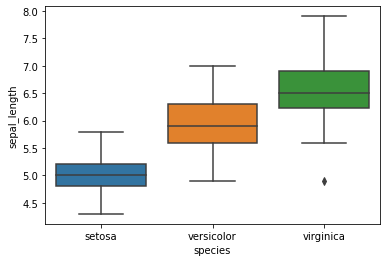

In [ ]:
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.show()

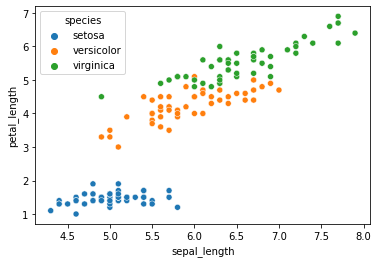

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue="species", data=iris)
plt.show()

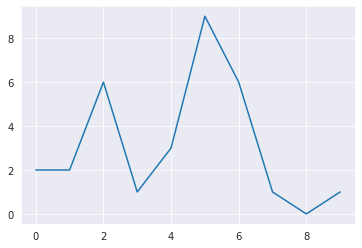

In [ ]:
# Визуализация отношений в данных
# Линейный график. Функция lineplot()

# Для визуализации отношений в данных в виде линейного графика применяется функция lineplot(). Такой тип графика чаще всего
# используется для визуализации временных рядов и зависимостей между переменными, имеющими непрерывный характер, например, 
# такими как температура, давление, стоимость и т.д.

sns.set_style("darkgrid")

# Сгенерируем набор случайных данных и воспользуемся функцией lineplot() для отображения зависимости между ними

np.random.seed(123)
x = [i for i in range(10)]
y = np.random.randint(10, size=len(x))
sns.lineplot(x = x, y = y)
plt.show()

In [ ]:
# На практике данные для анализа чаще всего подготавливаются в виде структур Series или DataFrame библиотеки pandas. 
# Создадим ещё несколько наборов данных

np.random.seed(123)
sample = [i for i in range(10)]
y = np.random.randint(10, size=len(sample))
z = np.random.randint(4, size=len(sample))
data = [sample, y, z]

In [ ]:
df = pd.DataFrame({'sample':sample, 'y_val': y, 'z_val': z})

In [ ]:
df.head(10)

,sample,y_val,z_val
0,0,2,2
1,1,2,3
2,2,6,1
3,3,1,0
4,4,3,2
5,5,9,0
6,6,6,3
7,7,1,1
8,8,0,3
9,9,1,2


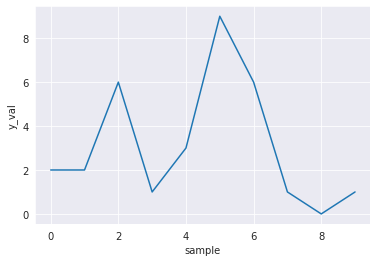

In [ ]:
# Отобразим зависимость y_val от sample из набора df с помощью функции lineplot()

sns.lineplot(x='sample', y='y_val', data=df)
plt.show()

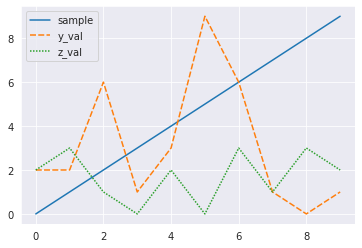

In [ ]:
# Если необходимо отобразить все элементы из DataFrame набора, то можно его передать в lineplot() через параметр data, 
# при этом не задавая x и y

sns.lineplot(data=df)
plt.show()

## Отображение математического ожидания и доверительных интервалов

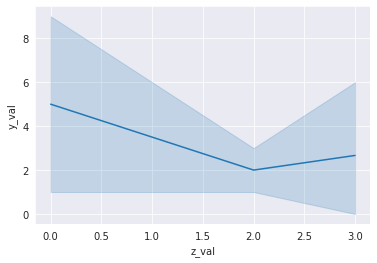

In [ ]:
# Построим график зависимости val_y от val_z. Обратите внимание: одному и тому же значению val_z (например, 0) 
# будет соответствовать несколько значений val_y (в нашем случае — это 1 и 9). 

sns.lineplot(x='z_val', y='y_val', data=df)
plt.show()

<ipython-input-17-e05d5177b8b0>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='z_val', y='y_val', ci='sd', data=df)


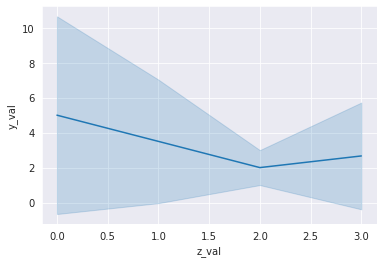

In [ ]:
# В этом случае по оси ординат будут откладываться не значения параметра y, а его математическое ожидание. Например для z_val=0,
# y_val=(1+9)/2=5, что мы и видим на графике. Более светлая область вокруг линии — это 95% доверительный интервал, 
# если вместо него необходимо отобразить стандартное отклонение, то следует присвоить параметру ci функции lineplot() 
# значение 'sd'

sns.lineplot(x='z_val', y='y_val', ci='sd', data=df)
plt.show()

<ipython-input-18-233d59269d09>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='z_val', y='y_val', ci=None, data=df)


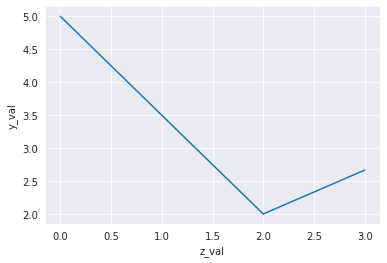

In [ ]:
# Отображение доверительного интервала (или стандартного отклонения) можно отключить, передав в ci значение None

sns.lineplot(x='z_val', y='y_val', ci=None, data=df)
plt.show()

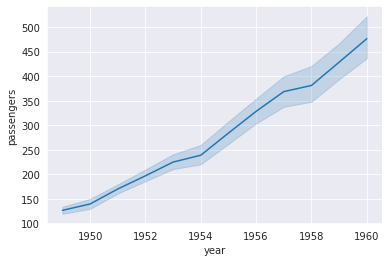

In [ ]:
# Вернемся к примеру, иллюстрирующему зависимость пассажиропотока от года из набора данных flights

flights = sns.load_dataset("flights")
sns.lineplot(x='year', y='passengers', data=flights)
plt.show()

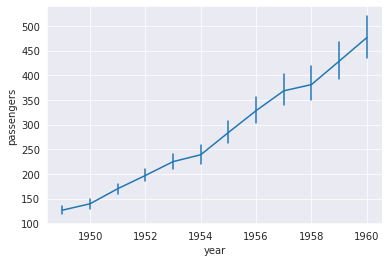

In [ ]:
# Для управления видом отображения доверительного интервала (сплошная заливка, метки) используется параметр err_style, который
# может принимать значения 'band', 'bars' или None. Значение 'band' определяет сплошную заливку, как это представлено на рисунке выше.
# Значение 'bars' отображает доверительный интервал в виде отрезков

sns.lineplot(x='year', y='passengers', err_style='bars', data=flights)
plt.show()

## Повышение информативности графика

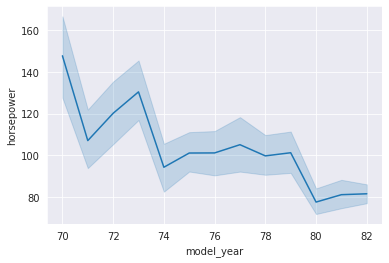

In [ ]:
# Функция lineplot() предоставляет три параметра, используя которые можно повысить информативность графика, связав 
# дополнительные признаки набора с такими визуальными аспектами как цвет, стиль линии и размер. 
# За это отвечают параметры: hue (цвет), style (стиль линии) и size (размер). Рассмотрим работу с ними на примерах.

import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")
df = sns.load_dataset("mpg")

# Отобразим зависимость мощности автомобиля от года выпуска

sns.lineplot(x='model_year', y='horsepower', data=df) 
plt.show()

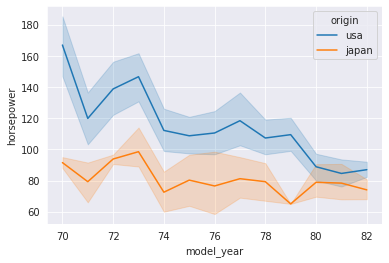

In [ ]:
# Если стоит задача изучить зависимость мощности автомобиля от года выпуска отдельно для стран США и Японии, то можно 
# воспользоваться параметром hue для выделения стран цветом

sns.lineplot(x='model_year', y='horsepower', hue='origin', data=df[df['origin'] != 'europe'])
plt.show()

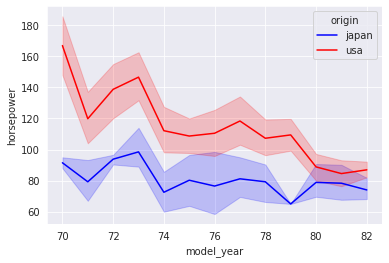

In [ ]:
# Для дополнительной настройки цветового разделения можно использовать следующие параметры функции lineplot(): palette,
# hue_order, hue_norm

# Изменим цвет и зададим порядок
df_usa_jp = df[df['origin'] != 'europe']
sns.lineplot(x='model_year', y='horsepower', hue='origin', 
palette={'usa':'r', 'japan':'b'}, hue_order=['japan', 'usa'], data=df_usa_jp)
plt.show()

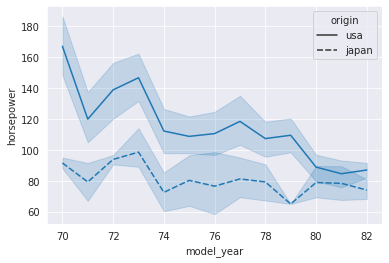

In [ ]:
# Для сегментации данных с помощью стиля линии используется параметр style, через него задаётся признак, по которому будет 
# производиться разделение

sns.lineplot(x='model_year', y='horsepower', style='origin', data=df_usa_jp)
plt.show()

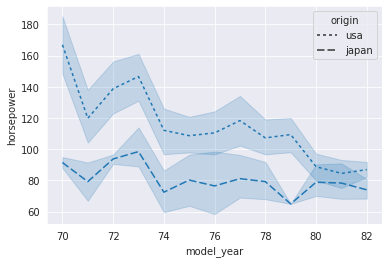

In [ ]:
# Параметр dashes определяет тип штриховки

sns.lineplot(x='model_year', y='horsepower', style='origin', 
dashes={'usa': (2, 2), 'japan': (5, 2)}, data=df_usa_jp)
plt.show()

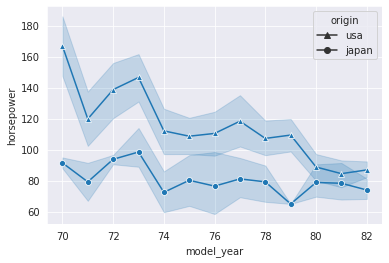

In [ ]:
# Добавим маркеры:
sns.lineplot(x='model_year', y='horsepower', style='origin', 
dashes=False, markers={'usa': '^', 'japan': 'o'}, data=df_usa_jp)
plt.show()

## Повышение информативности графика scatterplot

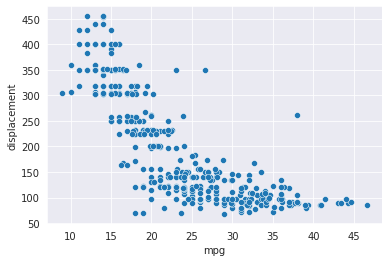

In [ ]:
mpg = sns.load_dataset("mpg")

# Построим точечный график зависимости дальности пробега (displacement) автомобиля от расхода топлива (mpg)

sns.scatterplot(x='mpg', y='displacement', data=mpg)
plt.show()

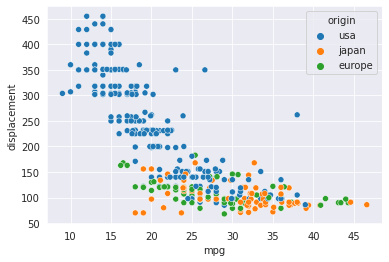

In [ ]:
# Выделим цветом страну производителя

sns.scatterplot(x='mpg', y='displacement', hue='origin', data=mpg )
plt.show()

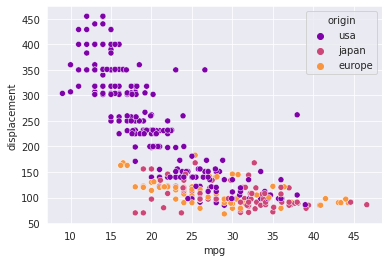

In [ ]:
# Изменим цветовую палитру

sns.scatterplot(x='mpg', y='displacement', hue='origin', palette='plasma', data=mpg)
plt.show()

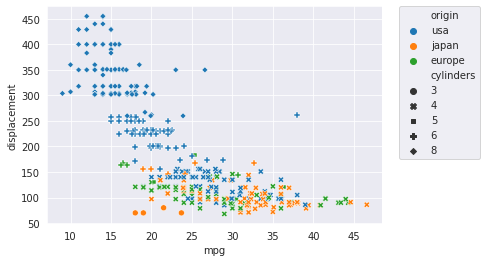

In [ ]:
# За стиль маркеров в нашем примере будет отвечать признак количество цилиндров (cylinders)

sns.scatterplot(x='mpg', y='displacement', hue='origin', style='cylinders', data=mpg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

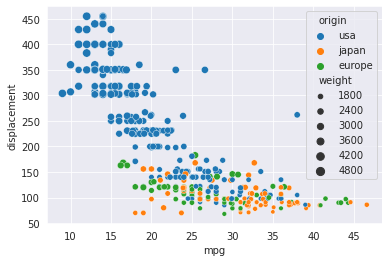

In [ ]:
# будем использовать вес автомобиля (признак weigh) для управления размером маркеров

sns.scatterplot(x='mpg', y='displacement', hue='origin', size='weight', data=mpg)
plt.show()

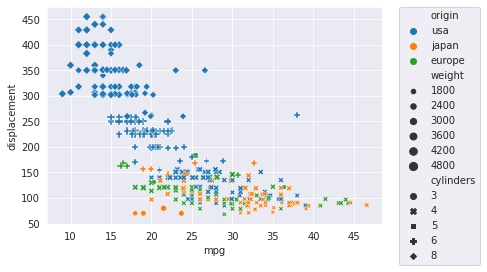

In [ ]:
# Воспользуемся всеми тремя инструментами: hue, size и style одновременно

sns.scatterplot(x='mpg', y='displacement', hue='origin', size='weight', style='cylinders', data=mpg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Визуализация отношений с настройкой подложки

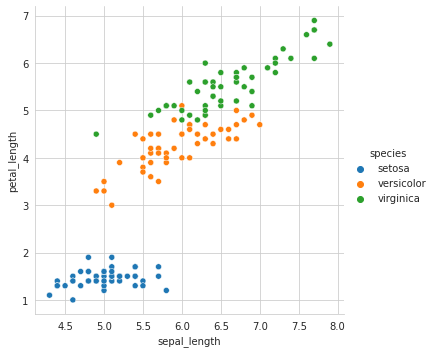

In [ ]:
# Библиотека seaborn предоставляет ещё одну функцию для визуализации отношений в данных: relplot(). В отличие от lineplot() и
# scatterplot(), она предоставляет возможность настраивать не только внешний вид непосредственно самого графика, 
# но и фигуру — подложку, на которой располагаются все графические компоненты

sns.set_style('whitegrid')

iris = sns.load_dataset('iris')
sns.relplot(x='sepal_length', y='petal_length', hue='species', kind='scatter', data=iris)
plt.show()

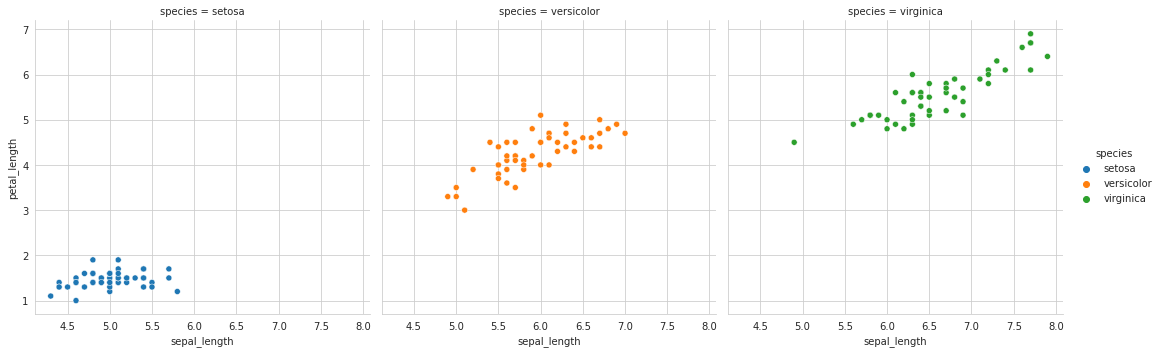

In [ ]:
# Построим диаграммы на трёх отдельных полях, в качестве разделяющего параметра будем использовать тип ириса (species)

sns.relplot(x='sepal_length', y='petal_length', hue='species', kind='scatter', data=iris, col='species')
plt.show()

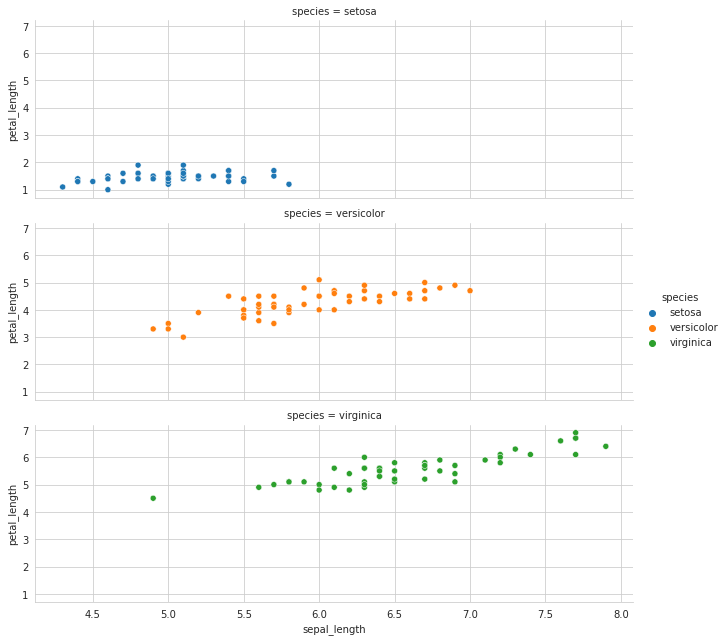

In [ ]:
# Произведём разделение по строкам с помощью параметра row и зададим размеры полей через height и aspect

sns.relplot(x='sepal_length', y='petal_length', hue='species', 
kind='scatter', data=iris, row='species', height=3, aspect=3)
plt.show()

## Визуализация категориальных данных

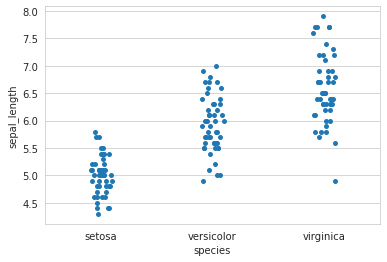

In [ ]:
# Визуализация категориальных данных в виде точечных диаграмм
# К этой группе инструментов для визуализации категориальных данных относятся функции stripplot() и swarmplot().

iris = sns.load_dataset("iris")
sns.stripplot(x='species', y='sepal_length', data=iris)
plt.show()

In [ ]:
# Для повышения информативности диаграммы можно использовать параметры для настройки цветовой схемы, размера и цвета обводки маркеров.

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


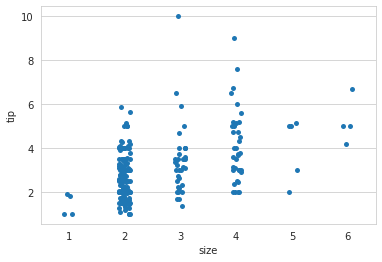

In [ ]:
# В этом наборе содержатся данные о размерах оставленных чаевых, разделённые по следующим признакам: total_bill — общий счёт (в
# долларах США), tip — размер чаевых (в долларах США), sex — пол, smoker — курит клиент или нет, time — время: обед или ланч, 
# size — размер компании

# Построим точечный график зависимости размера чаевых (tips) от количества человек в отдыхающей компании (size)

sns.stripplot(x="size", y='tip', data=tips)
plt.show()

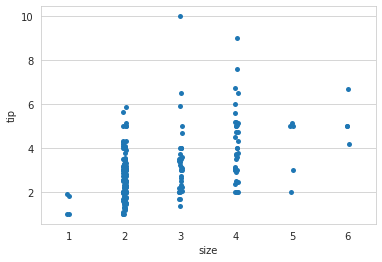

In [ ]:
# Кучность представляемых наборов регулируется параметром jitter. 
# Эта опция может быть полезна, если необходимо устранить перекрытие между наборами данных.

sns.stripplot(x="size", y='tip', size=5, jitter=0.03, data=tips)
plt.show()

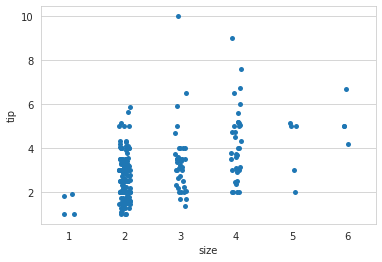

In [ ]:
# Если jitter присвоить True, то будет автоматически подобрано наиболее оптимальное значение

sns.stripplot(x="size", y='tip', size=5, jitter=True, data=tips)
plt.show()

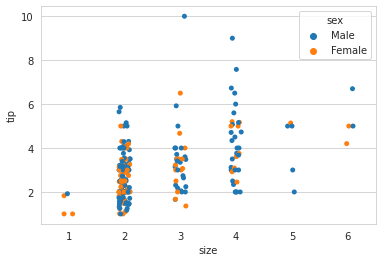

In [ ]:
# Теперь выделим цветом пол людей, для этого присвоим параметру hue значение sex

sns.stripplot(x="size", y='tip', hue="sex", data=tips)
plt.show()

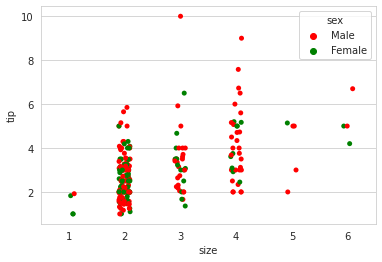

In [ ]:
# Изменим цветовую палитру через параметр palette

color_palette = {"Male":"r", "Female":"g"}
sns.stripplot(x="size", y='tip', hue="sex", palette=color_palette, data=tips)
plt.show()

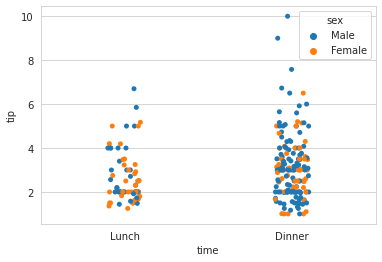

In [ ]:
# Построим диаграмму зависимости чаевых от пола клиента

sns.stripplot(x="time", y='tip', hue='sex', data=tips)
plt.show()

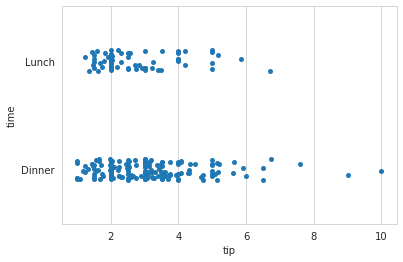

In [ ]:
# Ориентация диаграммы задаётся через параметр orient

sns.stripplot(x="tip", y='time', orient='h', data=tips)
plt.show()

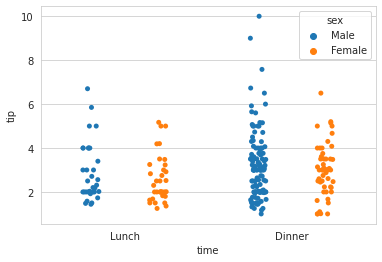

In [ ]:
# Для улучшения наглядности диаграммы, в которой используется цветовое разделение через параметр hue, можно
# представить полученные наборы в виде визуально различимых групп с помощью параметра dodge

sns.stripplot(x="time", y='tip', hue="sex", dodge=True, data=tips)
plt.show()

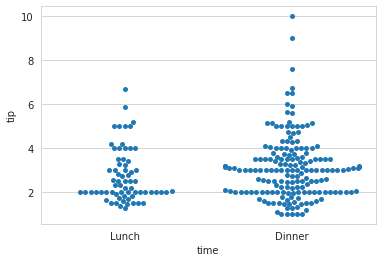

In [ ]:
# Функция swarmplot() по своему функционалу и параметрам для настройки отображения подобна функции stripplot(), за исключением
# параметра jitter, который у неё отсутствует. Идея swarmplot() в том, что отображаемые точки на диаграмме не перекрываются, 
# это позволяет делать выводы о преобладании тех или иных значений в наборах данных по их визуальному распределению.

sns.swarmplot(x="time", y='tip', data=tips)
plt.show()

In [ ]:
# Из представленной диаграммы можно сделать вывод, что за ланчем чаще всего оставляют два доллара в качестве чаевых, 
# а за обедом от двух до четырёх долларов

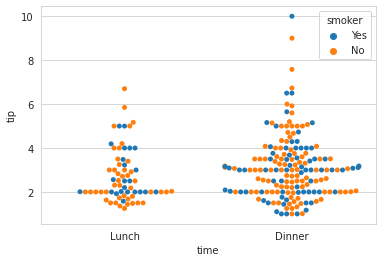

In [ ]:
# Для задания цветовой схемы будем использовать признак, отвечающий за то, курили при этом клиенты или нет

sns.swarmplot(x="time", y='tip', hue="smoker", data=tips)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


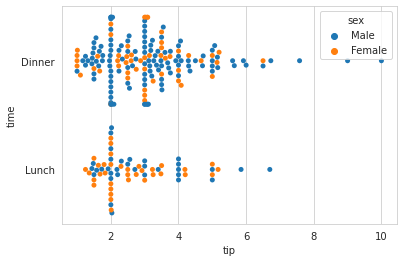

In [ ]:
# За ориентацию диаграммы отвечает параметр orient, за порядок — order, параметр dodge управляет визуальным разделением данных.
# Проиллюстрируем на примерах их использование. Изменим ориентацию и порядок отображения значений признака time

sns.swarmplot(x="tip", y='time', order=['Dinner', 'Lunch'], orient='h', hue="sex", data=tips)
plt.show()

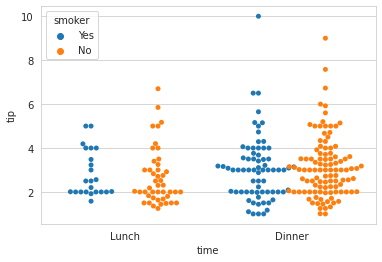

In [ ]:
# Разделим с помощью параметра dodge выбору на группы

sns.swarmplot(x="time", y='tip', hue="smoker", dodge=True, data=tips)
plt.show()

## boxplot()

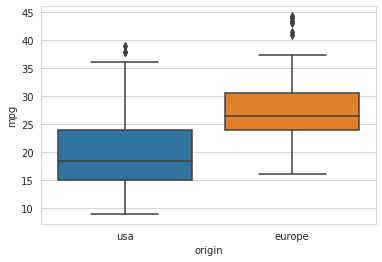

In [ ]:
# Простроим диаграмму для набора данных mpg, отобразим распределение количества миль, которое автомобиль проезжает на
# одном галлоне топлива для США и Европы:

mpg = sns.load_dataset("mpg")
mpg_mod = mpg[mpg["origin"] != "japan"]
sns.boxplot(x="origin", y="mpg", data=mpg_mod)
plt.show()

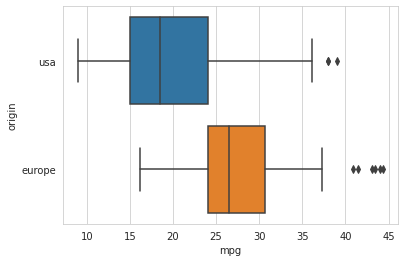

In [ ]:
sns.boxplot(x="mpg", y="origin", orient='h', data=mpg_mod)
plt.show()

## violin()

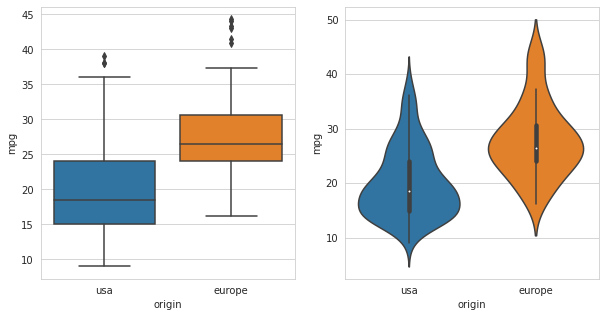

In [ ]:
# По своему функциональному назначению и возможностям она похожа на рассмотренную ранее boxplot(), 
# дополнительно на ней отображается оценка плотности ядра.

mpg_mod = mpg[mpg["origin"] != "japan"]
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x="origin", y="mpg", data=mpg_mod)
plt.subplot(122)
sns.violinplot(x="origin", y="mpg", data=mpg_mod)
plt.show()

## Визуализация оценок категориальных данных

In [ ]:
# В данную группу входят функции pointplot(), barplot() и countplot(), их назначение — это визуализация различных
# обобщенных характеристик наборов данных

dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


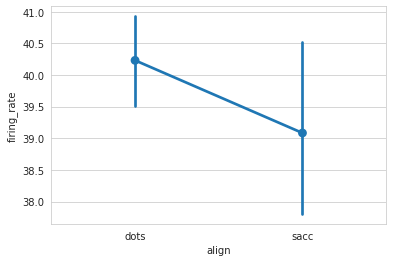

In [ ]:
sns.pointplot(x='align', y='firing_rate', data=dots)
plt.show()

# Вертикальными линиями обозначен 95% доверительный интервал.

In [ ]:
# Как вы можете видеть из рисунка: среднее значение firing_rate, для align=dots приблизительно равно 40.25, 
# для align=sacc составляет 39.1.

# Получим точные значения этих величин:

dots[dots["align"]=='sacc']['firing_rate'].mean()

39.083297066051415

In [ ]:
dots[dots["align"]=='dots']['firing_rate'].mean()

40.231249481220054

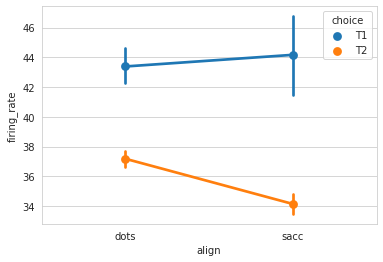

In [ ]:
# Добавим ещё один уровень разделения — по признаку choice, выделим его с помощью параметра hue:

sns.pointplot(x='align', y='firing_rate', hue='choice', data=dots)
plt.show()

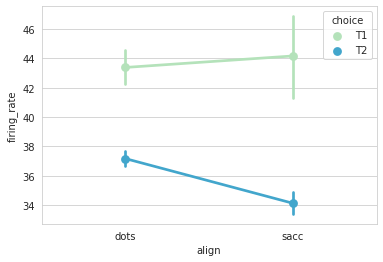

In [ ]:
# Изменим цветовую палитру:
sns.pointplot(x='align', y='firing_rate', hue='choice', palette='GnBu', data=dots)
plt.show()

## Столбчатая диаграмма

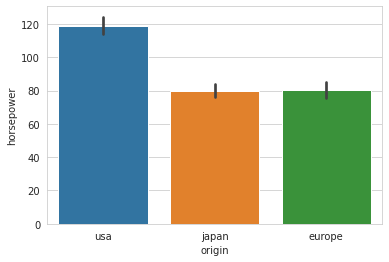

In [ ]:
# Высота бара (столбца) определяет численное значение оценки признака(математическое ожидание, медиана и т.п.), линия, пересекающая в верхнюю границу бара — доверительный интервал

mpg = sns.load_dataset("mpg")
sns.barplot(x='origin', y='horsepower', data=mpg)
plt.show()

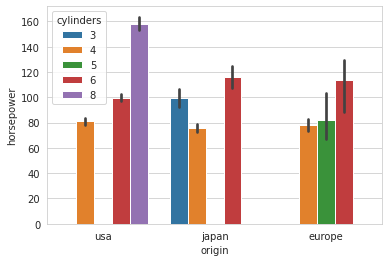

In [ ]:
# Через аргумент hue можно задать ещё один уровень разделения данных, воспользуемся этим для дополнительной сегментации 
# по количеству цилидров в двигателе автомобиля:

sns.barplot(x='origin', y='horsepower', hue='cylinders', data=mpg)
plt.show()

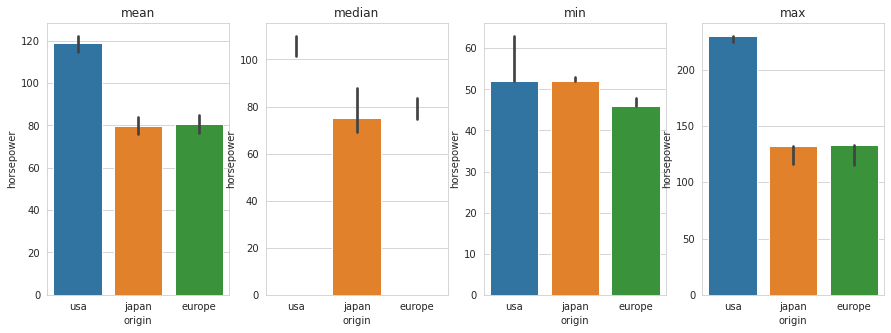

In [ ]:
from numpy import median
from numpy import mean

estimator = [mean, median, min, max]
plt.figure(figsize=(15, 5))
for i, es in enumerate(estimator):
 plt.subplot(1, len(estimator), i+1)
 plt.title(es.__name__)
 sns.barplot(x='origin', y='horsepower', estimator=es, data=mpg)
plt.show()

<ipython-input-63-80377912b174>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='origin', y='horsepower', ci=c, data=mpg)
<ipython-input-63-80377912b174>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 80)` for the same effect.

  sns.barplot(x='origin', y='horsepower', ci=c, data=mpg)
<ipython-input-63-80377912b174>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='origin', y='horsepower', ci=c, data=mpg)


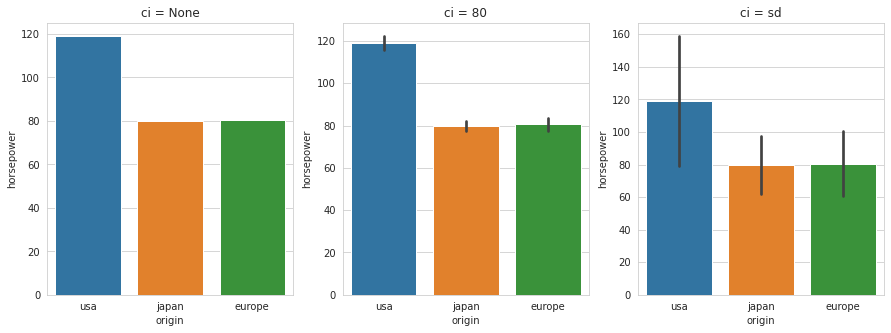

In [ ]:
# Задание доверительного интервала (или стандартного отклонения) производится через параметр ci:

cis = [None, 80, 'sd']
plt.figure(figsize=(15, 5))
for i, c in enumerate(cis):
 plt.subplot(1, len(cis), i+1)
 plt.title(f"ci = {c}")
 sns.barplot(x='origin', y='horsepower', ci=c, data=mpg)
plt.show()

## countplot()

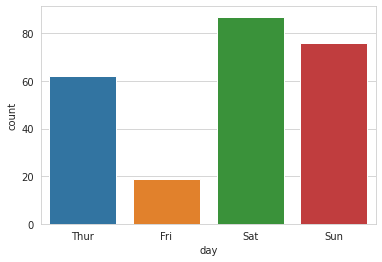

In [ ]:
# Функция countplot() определяет количество элементов из набора данных, которые относятся к той или иной категории, 
# и отображает полученное значение в виде столбчатой диаграммы.

tips = sns.load_dataset("tips")
sns.countplot(x="day", data=tips)
plt.show()

# Построим диаграмму распределения, в качестве признака для оси x укажем day: 

## Визуализация распределений в данных

<ipython-input-65-f56403e333a7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


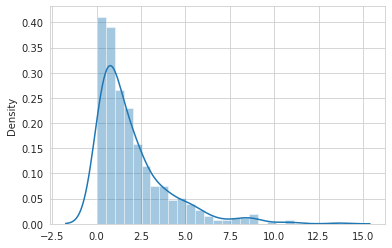

In [ ]:
# Функция distplot() предназначена для визуализации распределений одномерных наборов данных. 

# Построим набор данных для экспериментов и визуализируем его:

np.random.seed(123)
x = np.random.chisquare(2,500)
sns.distplot(x)
plt.show()

## pairplot()

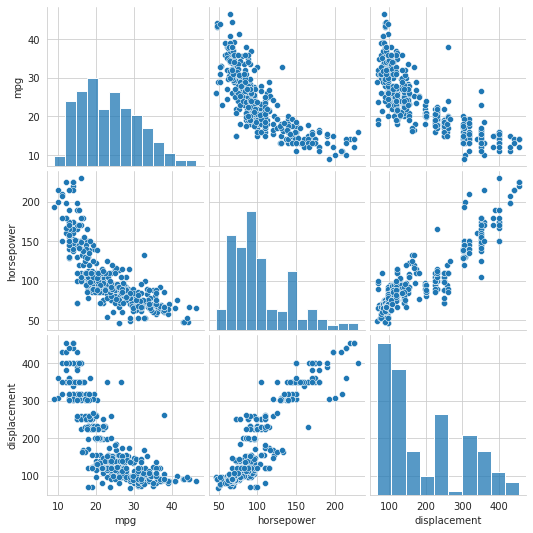

In [ ]:
# Функция pairplot() строит сетку элементами, которой являются графики попарного сравнения заданного набора признаков.

# Загрузим набор данных mpg и извлечём из него подвыборку, содержащую только признаки mpg, horsepower, displacement, origin:

mpg = sns.load_dataset("mpg")
mpg_mod = mpg[["mpg", "horsepower", "displacement", "origin"]]

sns.pairplot(mpg_mod) 
plt.show()

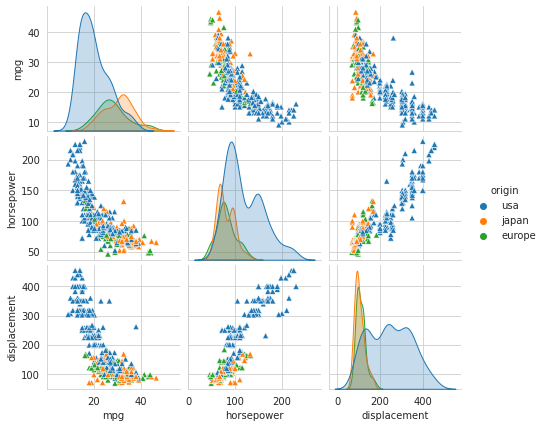

In [ ]:
# Добавим разделение по категориальному признаку origin, для точечной диаграммы зададим треугольный маркер, 
# а также укажем высоту и соотношение сторон:

sns.pairplot(mpg_mod, hue="origin", markers="^", height=2, aspect=1.1)
plt.show()

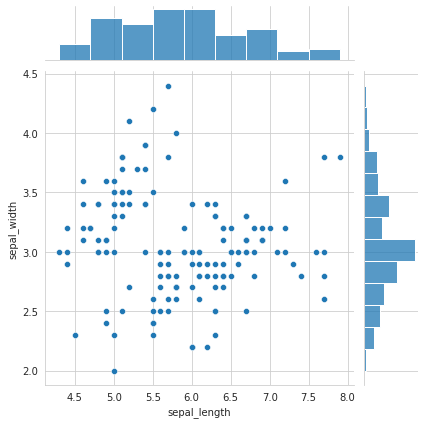

In [ ]:
iris = sns.load_dataset("iris")
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
plt.show()

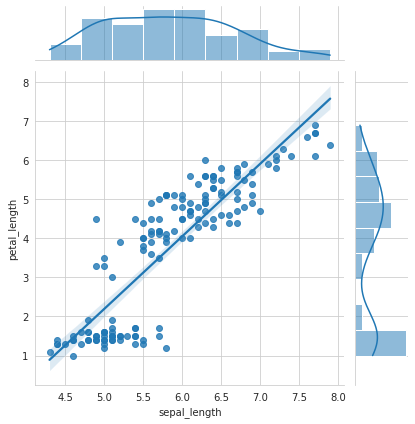

In [ ]:
sns.jointplot(x='sepal_length', y='petal_length', data=iris, kind="reg")
plt.show()

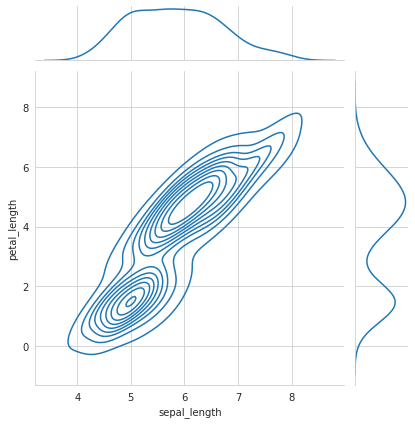

In [ ]:
sns.jointplot(x='sepal_length', y='petal_length', data=iris, kind="kde")
plt.show()

# Исследование набора данных

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/My Drive/HousePrices.csv', index_col=0)
df

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [9]:
from scipy.stats import norm

Для признака "цена дома" и "размер участка" были построены гистограмы и дополнительные графики для сранения с нормальным расределением

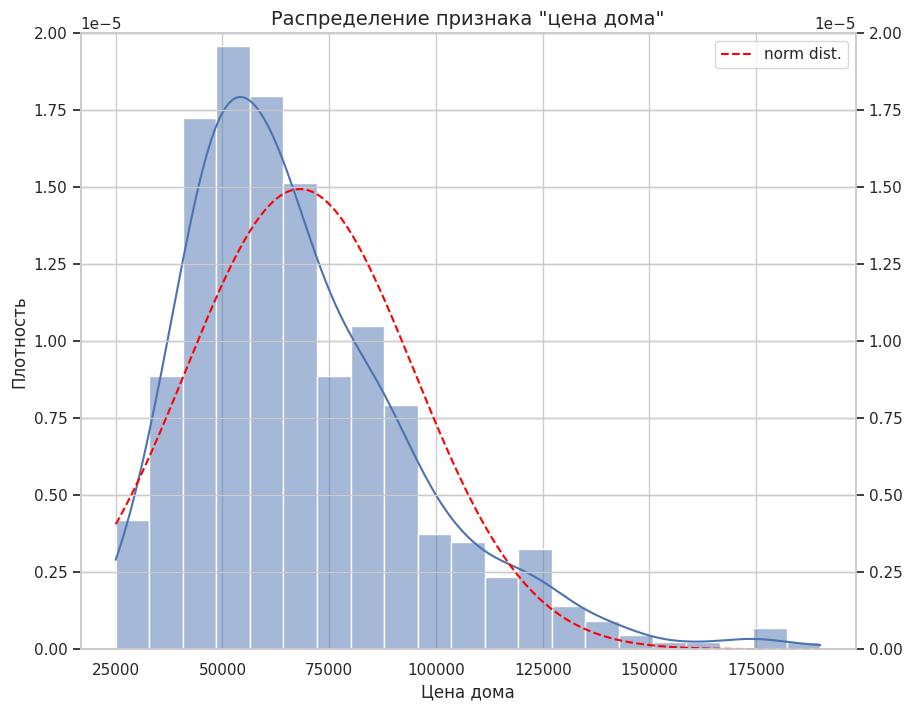

In [10]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.histplot(df["price"], kde=True, stat="density")
ax.set_ylim(bottom=0, top=0.00002);

x = np.arange (df['price'].min(), df['price'].max(), 0.1)

ax2 = ax.twinx()
ax2 = sns.lineplot(x=x, y=norm.pdf(x, df['price'].mean(), df['price'].std()), color='red', linestyle='--', label='norm dist.')
ax2.set_ylim(bottom=0, top=0.00002)

ax.set_xlabel("Цена дома")
ax.set_ylabel("Плотность")
ax.set_title('Распределение признака "цена дома"', fontsize=14);

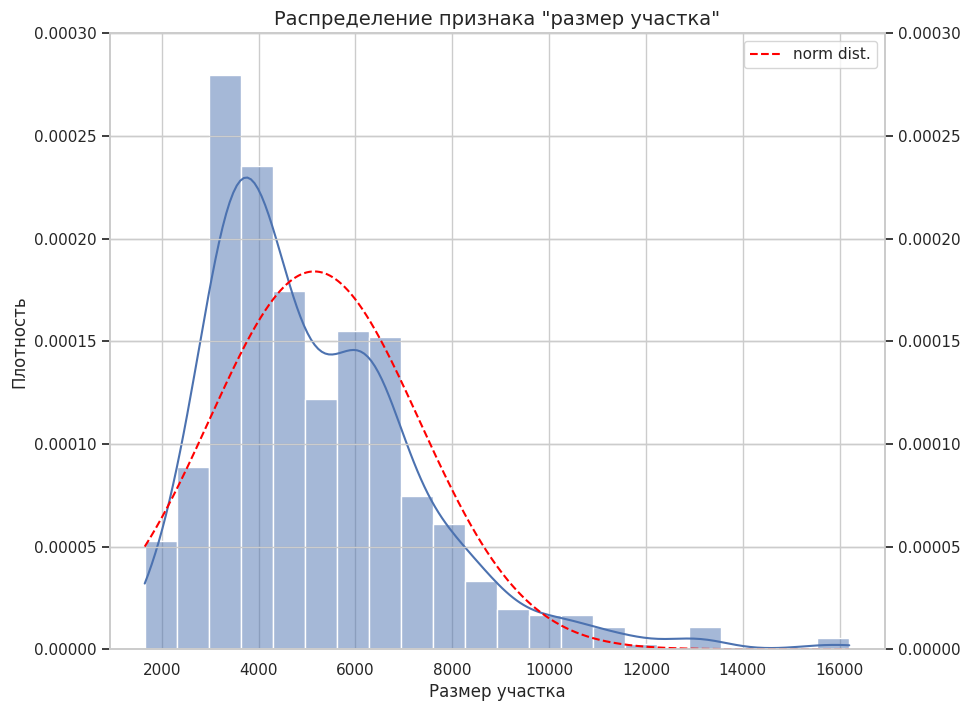

In [11]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.histplot(df["lotsize"], kde=True, stat="density")
ax.set_ylim(bottom=0, top=0.0003)

x = np.arange (df['lotsize'].min(), df['lotsize'].max(), 0.1)

ax2 = ax.twinx()
ax2 = sns.lineplot(x=x, y=norm.pdf(x, df['lotsize'].mean(), df['lotsize'].std()), color='red', linestyle='--', label='norm dist.')
ax2.set_ylim(bottom=0, top=0.0003)

ax.set_xlabel("Размер участка")
ax.set_ylabel("Плотность")
ax.set_title('Распределение признака "размер участка"', fontsize=14);

**Вывод**: можно сказать, что признаки имеют нормальное распределение

Для тех же признаков были построены графики "ящик с усами" для исследования средних значений по количеству спален

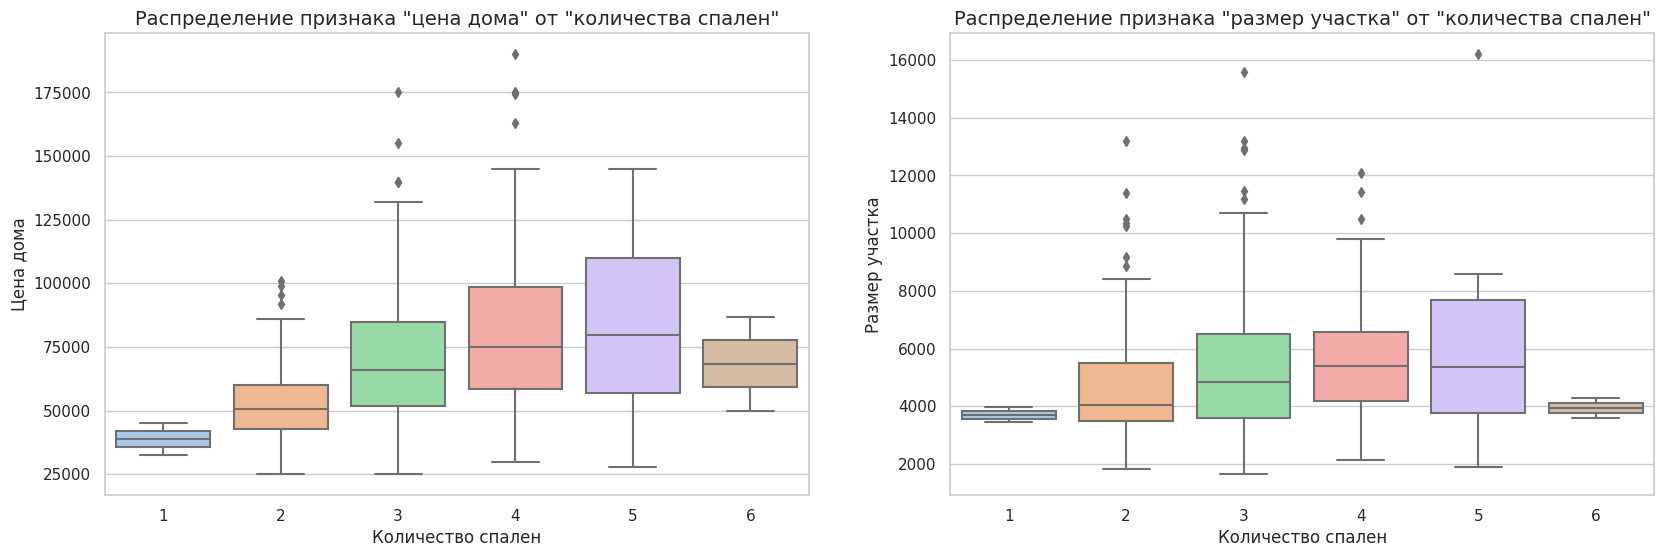

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x="bedrooms", y="price", data=df, palette='pastel', ax=ax[0])
ax[0].set_xlabel("Количество спален")
ax[0].set_ylabel("Цена дома")
ax[0].set_title('Распределение признака "цена дома" от "количества спален"', fontsize=14)

sns.boxplot(x="bedrooms", y="lotsize", data=df, palette='pastel', ax=ax[1])
ax[1].set_xlabel("Количество спален")
ax[1].set_ylabel("Размер участка")
ax[1].set_title('Распределение признака "размер участка" от "количества спален"', fontsize=14);

**Вывод**: так как объектов с количеством спален равным 1 и 6 = 1, можно сделать вывод, что средняя цена дома повышается с увеличением количества спален, тот же вывод можно сделать и о размере участка

1. **price** - цена дома (количественный признак) (Фунты стерлингов: 25000-190000)
2. **lotsize** - размер участка недвижимости (количественный признак) (Квадратные футы: 1650-16200)
3. **bedrooms** - количество спален (категориальный признак) (1, 2, 3, 4, 5, 6)
4. **bathrooms** - количество ванных комнат (категориальный признак) (1, 2, 3, 4)
5. **driveway** - есть ли к дому подъездная дорога (бинарная переменная) (yes, no)
6. **recreation** - есть ли в доме комната отдыха (бинарная переменная) (yes, no)
7. **fullbase** - есть ли в доме полностью готовый подвал (бинарная переменная) (yes, no)
8. **gasheat** - используется ли в доме газ для нагрева горячей воды (бинарная переменная) (yes, no)
9. **aircon** - есть ли центральное кондиционирование воздуха (бинарная переменная) (yes, no)
10. **garage** - количество мест в гараже (количественный признак) (0, 1, 2, 3)
11. **prefer** - расположен ли дом в предпочтительном районе города (бинарная переменная) (yes, no)
12. **stories** - количество этажей без учета подвала (категориальный признак) (1, 2, 3, 4)

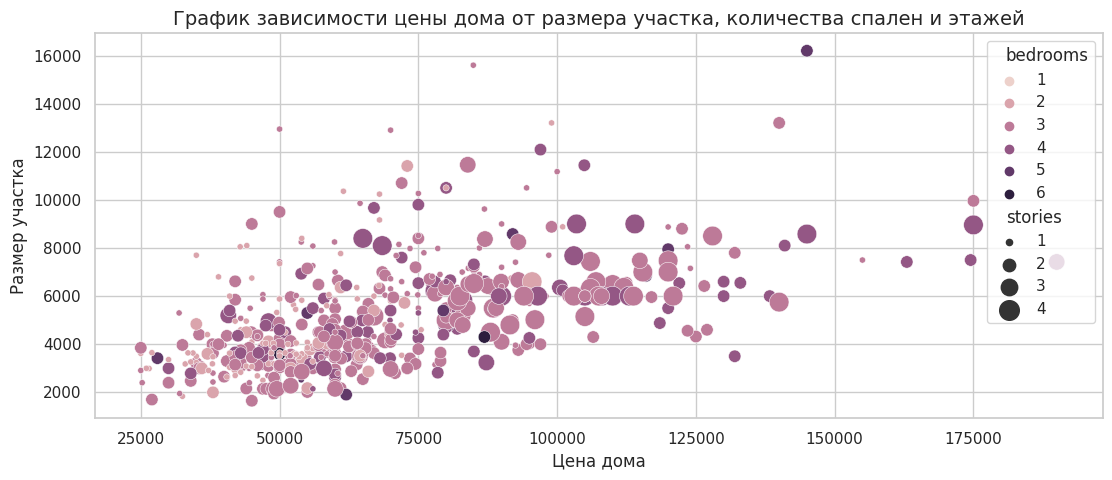

In [13]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(13, 5))

sns.scatterplot(x='price', y='lotsize', hue="bedrooms", size='stories', sizes=(20, 200), data=df);
ax.set_xlabel("Цена дома")
ax.set_ylabel("Размер участка")
ax.set_title('График зависимости цены дома от размера участка, количества спален и этажей', fontsize=14);

**Вывод**: Из графика можно сделать вывод, что среди объектов преобладают дома с количеством спален равным 3, также видно, что более светлый участок (количество спален = 2) преобладает в левом нижнем углу и соотвествуют меньшей цене дома и размеру участка. Так можно сделать вывод о том, что чем правее располагается объект на графике, тем дороже он стоит и тем болеьшее количество этажей имеет 

In [14]:
df['bedrooms'].value_counts()

3    301
2    136
4     95
5     10
1      2
6      2
Name: bedrooms, dtype: int64

In [15]:
df_bed = df[(df['bedrooms']!= 1) & (df['bedrooms']!= 3) & (df['bedrooms']!= 5) & (df['bedrooms']!= 6)]

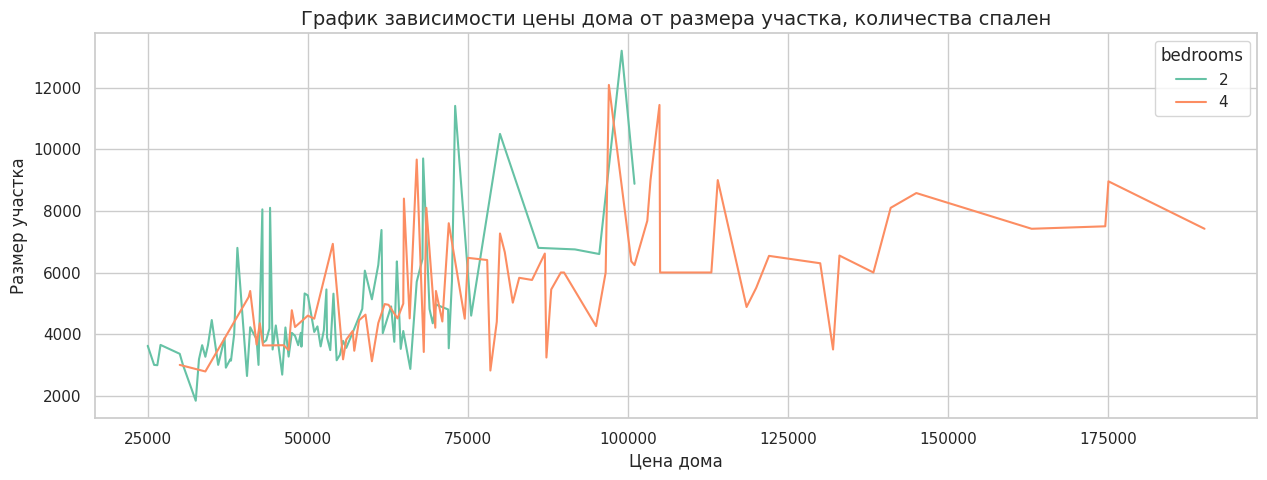

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='price', y='lotsize', hue='bedrooms', data=df_bed, err_style=None, palette='Set2')
ax.set_xlabel("Цена дома")
ax.set_ylabel("Размер участка")
ax.set_title('График зависимости цены дома от размера участка, количества спален', fontsize=14);

**Вывод**: нельзя сделать однозначного вывода о зависимости размер участка от количества спален, но можно увидеть зависимость в цене дома (чем больше спелен, тем выше цена)

In [17]:
df_bed = df[(df['bedrooms']!= 1) & (df['bedrooms']!= 5) & (df['bedrooms']!= 6)]

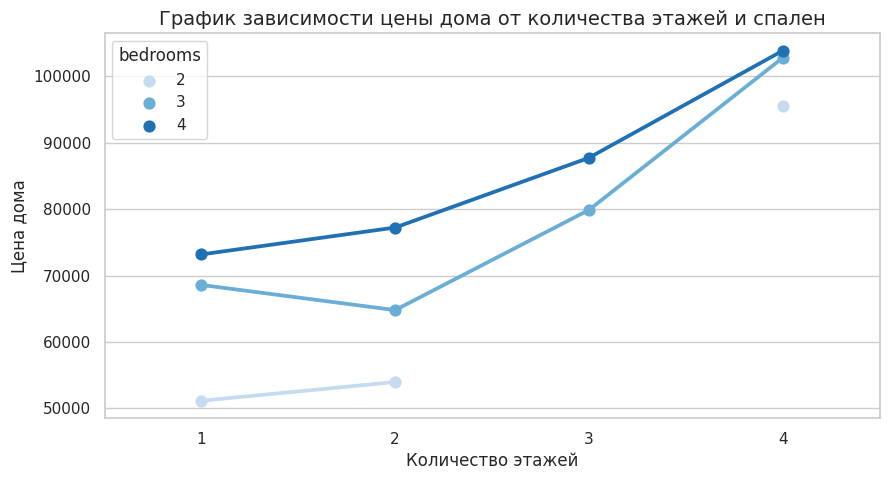

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.pointplot(x='stories', y='price', hue='bedrooms', palette='Blues', data=df_bed, errorbar=None)
ax.set_xlabel("Количество этажей")
ax.set_ylabel("Цена дома")
ax.set_title('График зависимости цены дома от количества этажей и спален', fontsize=14);

**Вывод**: при одинаковом количестве этажей цена дома тем выше, чем больше спален

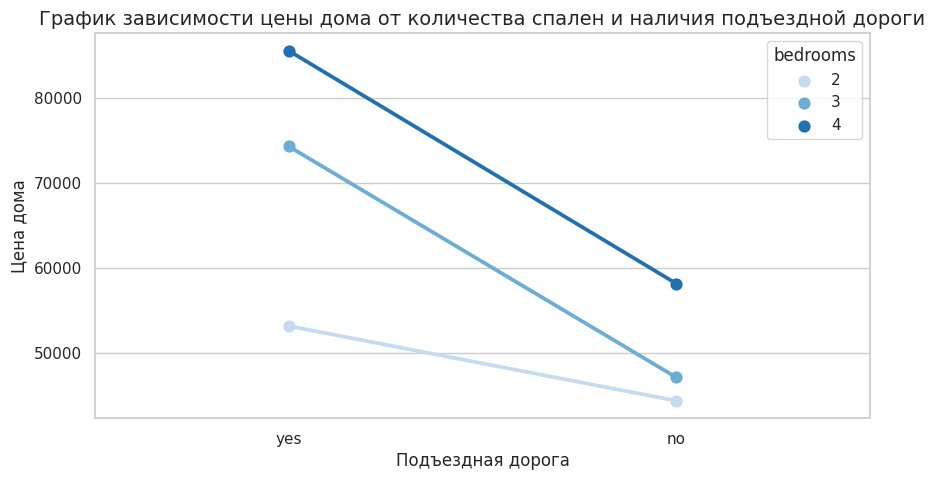

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.pointplot(x='driveway', y='price', hue='bedrooms', palette='Blues', data=df_bed, errorbar=None)
ax.set_xlabel("Подъездная дорога")
ax.set_ylabel("Цена дома")
ax.set_title('График зависимости цены дома от количества спален и наличия подъездной дороги', fontsize=14);

Вывод: такой же вывод можно сделать и о графике зависимости цены от количества спален и наличия подъездной дороги

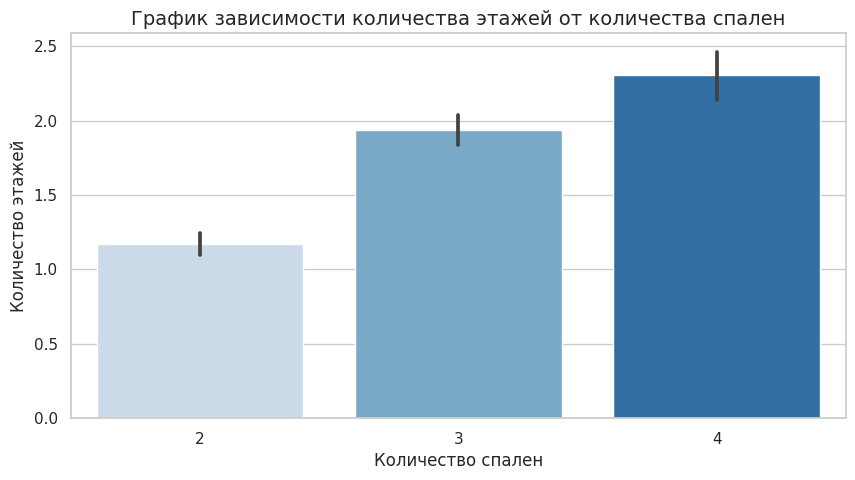

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='bedrooms', y='stories', data=df_bed, palette='Blues')
ax.set_xlabel("Количество спален")
ax.set_ylabel("Количество этажей")
ax.set_title('График зависимости количества этажей от количества спален', fontsize=14);

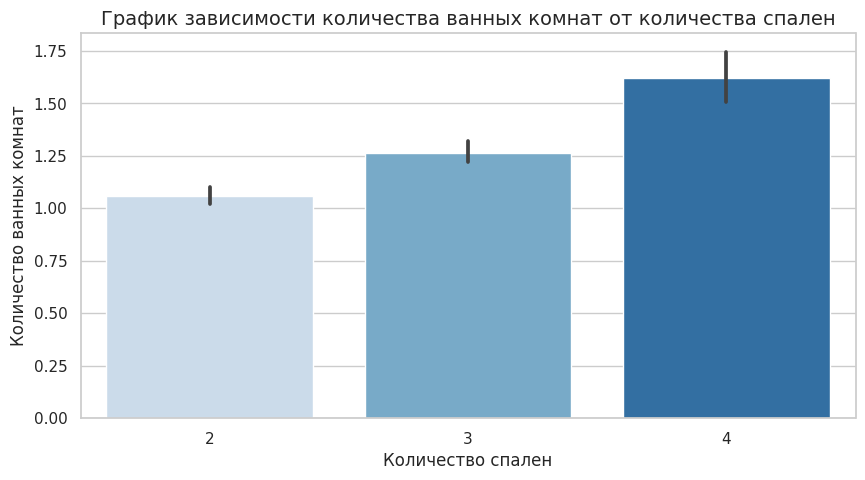

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='bedrooms', y='bathrooms', data=df_bed, palette='Blues')
ax.set_xlabel("Количество спален")
ax.set_ylabel("Количество ванных комнат")
ax.set_title('График зависимости количества ванных комнат от количества спален', fontsize=14);

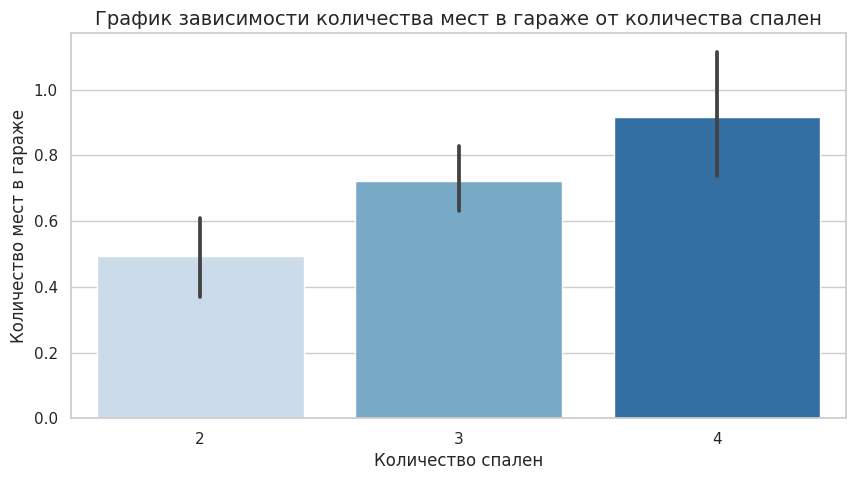

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='bedrooms', y='garage', data=df_bed, palette='Blues')
ax.set_xlabel("Количество спален")
ax.set_ylabel("Количество мест в гараже")
ax.set_title('График зависимости количества мест в гараже от количества спален', fontsize=14);

**Выводы**: исходя из трех графиков, приведенных выше, можно сделать вывод о том, что чем больше количество спален, тем больше количество этажей, ванных комнат и мест в гараже

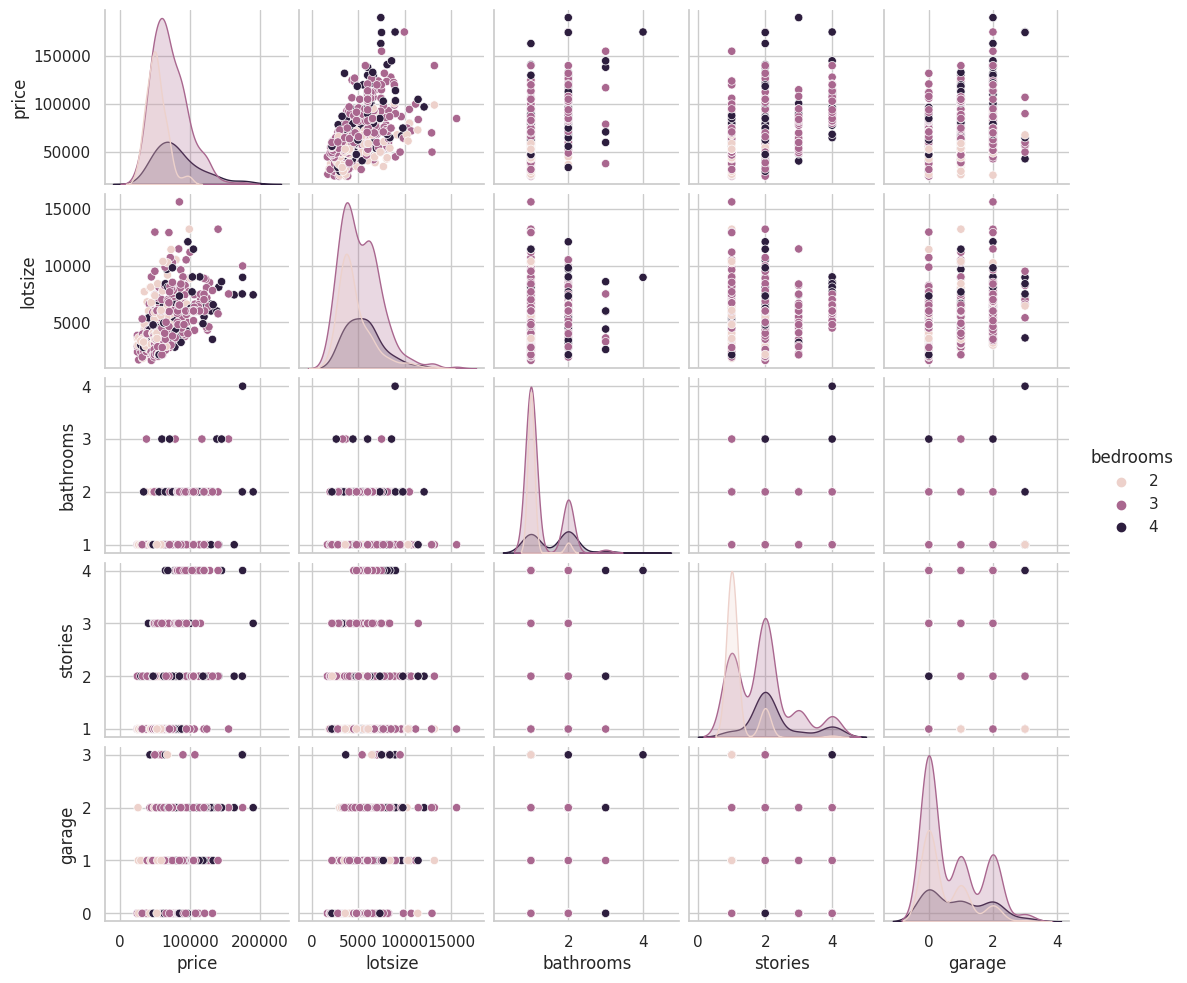

In [23]:
sns.pairplot(df_bed, hue='bedrooms', height=2, aspect=1.1)
plt.show()